In [1]:
import pandas as pd

In [2]:
fraud_data = pd.read_csv('Fraud.csv')


In [3]:
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
fraud_data.shape

(6362620, 11)

In [5]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
fraud_data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
legit = fraud_data[fraud_data['isFraud']==0]
fraud = fraud_data[fraud_data['isFraud']==1]

In [9]:
legit.shape

(6354407, 11)

In [10]:
legit.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [11]:
fraud.shape

(8213, 11)

In [12]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


# Transforming data set in equal proportion, so that the model is not bias


In [13]:
legit_sample = legit.sample(n=8213)

In [14]:
legit_sample.shape

(8213, 11)

In [15]:
new_data = pd.concat([legit_sample,fraud], axis=0)

In [16]:
new_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
294311,15,CASH_OUT,148027.38,C155139097,0.00,0.00,C2054885284,2328477.89,2476505.27,0,0
2203453,185,CASH_IN,203897.77,C272423836,591212.40,795110.17,C1937957908,1490844.93,2317429.61,0,0
4740581,332,TRANSFER,167438.74,C1960097105,0.00,0.00,C241582814,501913.43,669352.17,0,0
908989,43,PAYMENT,23288.60,C1261037658,29297.34,6008.75,M818073961,0.00,0.00,0,0
6132931,544,CASH_OUT,23491.52,C1923170228,202476.00,178984.48,C1099577964,9492908.42,9516399.94,0,0


In [17]:
new_data.shape

(16426, 11)

In [18]:
new_data['isFraud'].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

In [19]:
new_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000,16426.000000
mean,305.315536,8.227020e+05,1.235736e+06,5.179365e+05,8.092971e+05,1.240124e+06,0.500000,0.000974
std,193.220305,1.853669e+06,3.253537e+06,2.501886e+06,3.212567e+06,3.613110e+06,0.500015,0.031196
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,162.000000,3.639190e+04,1.063175e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,282.000000,1.730172e+05,1.165594e+05,0.000000e+00,0.000000e+00,1.217294e+05,0.500000,0.000000
75%,409.000000,5.426314e+05,7.862613e+05,0.000000e+00,5.042991e+05,1.085742e+06,1.000000,0.000000
max,743.000000,1.711203e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000


In [20]:
new_data.corr(numeric_only=True)['isFraud']

step              0.326571
amount            0.348112
oldbalanceOrg     0.127229
newbalanceOrig   -0.130123
oldbalanceDest   -0.082506
newbalanceDest    0.010956
isFraud           1.000000
isFlaggedFraud    0.031225
Name: isFraud, dtype: float64

In [21]:
import matplotlib.pyplot as plt

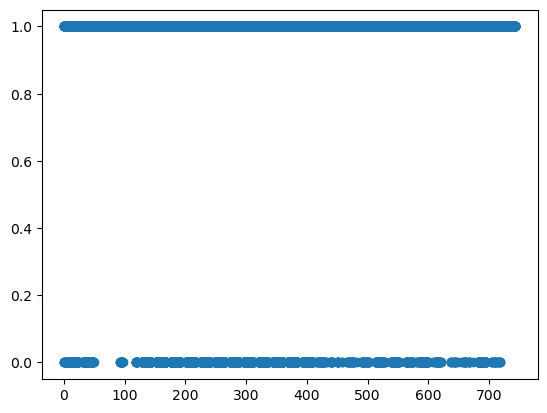

In [22]:
plt.scatter(new_data['step'], new_data['isFraud'])
plt.show()

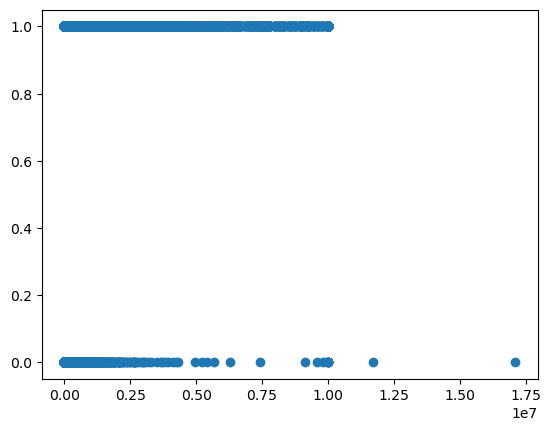

In [23]:
plt.scatter(new_data['amount'], new_data['isFraud'])
plt.show()

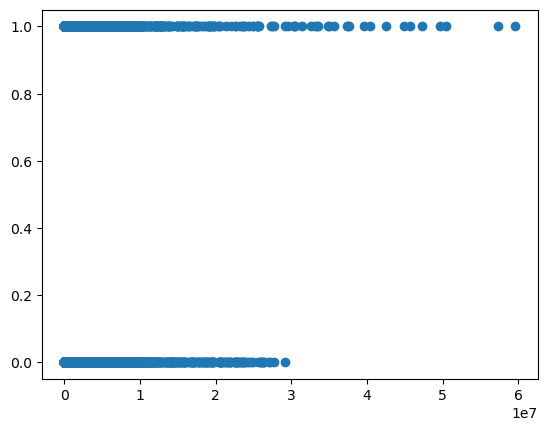

In [24]:
plt.scatter(new_data['oldbalanceOrg'], new_data['isFraud'])
plt.show()

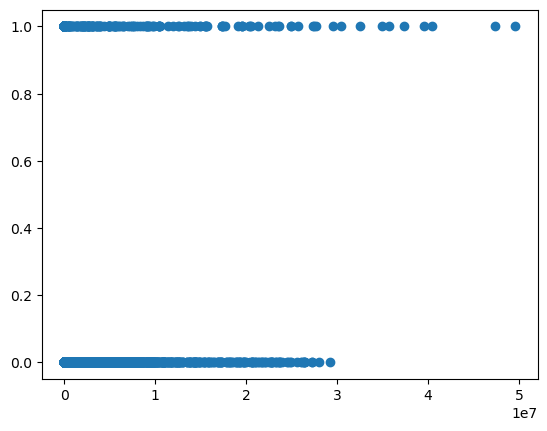

In [25]:
plt.scatter(new_data['newbalanceOrig'], new_data['isFraud'])
plt.show()

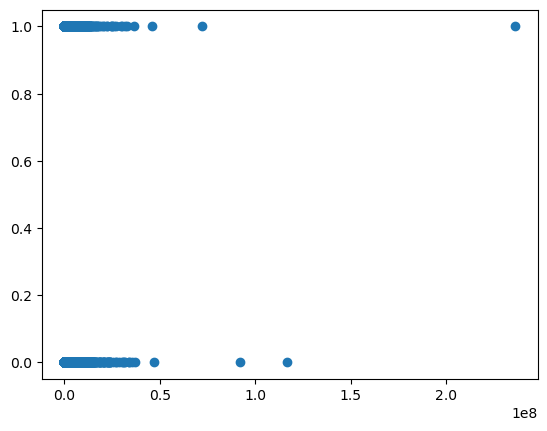

In [26]:
plt.scatter(new_data['oldbalanceDest'], new_data['isFraud'])
plt.show()

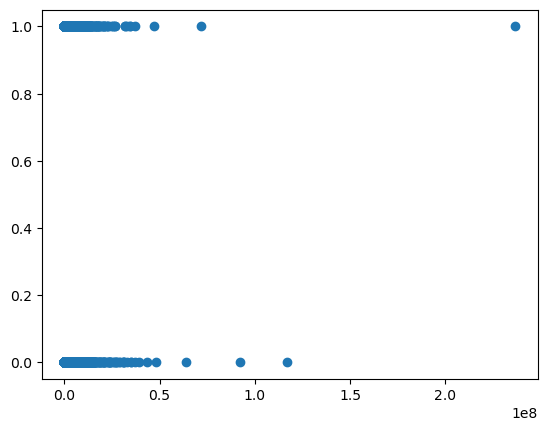

In [27]:
plt.scatter(new_data['newbalanceDest'], new_data['isFraud'])
plt.show()

In [28]:
new_data.groupby('isFraud').mean(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,242.217217,1.774366e+05,8.218049e+05,843480.345496,1.074345e+06,1.200540e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [29]:
new_data['isFraud'].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

In [30]:
new_data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    16410
1       16
Name: count, dtype: int64

In [49]:
new_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000,16426.000000
mean,305.315536,8.227020e+05,1.235736e+06,5.179365e+05,8.092971e+05,1.240124e+06,0.500000,0.000974
std,193.220305,1.853669e+06,3.253537e+06,2.501886e+06,3.212567e+06,3.613110e+06,0.500015,0.031196
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,162.000000,3.639190e+04,1.063175e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,282.000000,1.730172e+05,1.165594e+05,0.000000e+00,0.000000e+00,1.217294e+05,0.500000,0.000000
75%,409.000000,5.426314e+05,7.862613e+05,0.000000e+00,5.042991e+05,1.085742e+06,1.000000,0.000000
max,743.000000,1.711203e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000


In [31]:
new_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# There are no null values on the sampled data

In [32]:
new_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
294311,15,CASH_OUT,148027.38,C155139097,0.00,0.00,C2054885284,2328477.89,2476505.27,0,0
2203453,185,CASH_IN,203897.77,C272423836,591212.40,795110.17,C1937957908,1490844.93,2317429.61,0,0
4740581,332,TRANSFER,167438.74,C1960097105,0.00,0.00,C241582814,501913.43,669352.17,0,0
908989,43,PAYMENT,23288.60,C1261037658,29297.34,6008.75,M818073961,0.00,0.00,0,0
6132931,544,CASH_OUT,23491.52,C1923170228,202476.00,178984.48,C1099577964,9492908.42,9516399.94,0,0


# I selected variables by analyzing their relation with the target variable(isFraud)

In [33]:
predictors = new_data[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]

In [34]:
target = new_data[['isFraud']]

In [35]:
import numpy as np

In [36]:
X = np.asarray(predictors)
Y = np.asarray(target)


In [37]:
X

array([[1.50000000e+01, 1.48027380e+05, 0.00000000e+00, ...,
        2.32847789e+06, 2.47650527e+06, 0.00000000e+00],
       [1.85000000e+02, 2.03897770e+05, 5.91212400e+05, ...,
        1.49084493e+06, 2.31742961e+06, 0.00000000e+00],
       [3.32000000e+02, 1.67438740e+05, 0.00000000e+00, ...,
        5.01913430e+05, 6.69352170e+05, 0.00000000e+00],
       ...,
       [7.43000000e+02, 6.31140928e+06, 6.31140928e+06, ...,
        6.84888400e+04, 6.37989811e+06, 0.00000000e+00],
       [7.43000000e+02, 8.50002520e+05, 8.50002520e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.43000000e+02, 8.50002520e+05, 8.50002520e+05, ...,
        6.51009911e+06, 7.36010163e+06, 0.00000000e+00]])

In [38]:
Y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

# Yes, these factors make sense because:
- So if a transaction is fraud, then person will take longer time and hence step might be greater.
- Person making the fraud transaction will try to get away with large amount. So fraud transaction might have greater amount.
- In case of oldbalanceOrig, culprit may attach people with higher original balance. So oldbalanceOrig may be higher in fraud transaction.
- The newbalnceOrig will have large difference than oldbalanceOrig if the transaction is fraud.
- oldbalnceDest may be less, thats why the culprit is trying to steal the money.
- newbalanceDest may have large difference after culprit gets the fraud money.
- isFlaggedFraud tries to predict the fraud.


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [41]:
from sklearn.linear_model import LogisticRegression

# My model tries to predict if the transaction is fraud or legit by analyzing the previous transactions and figuring out the relationship between the predictor variables and target variable and using that on new test data.

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit(x_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
predictions = lr.predict(x_test)

In [45]:
predictions

array([0, 0, 0, ..., 0, 0, 1])

# Demonstrating the performance of model

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test, predictions)*100

90.38344491783323

#### The accuracy of model is 90.38%

# Company should do following things using the insights from data:

- Fraud Transactions have higher step. That means culprit is taking longer time for the transaction compared to legit transactions.
   So, If a transaction is taking step of more step, then the transaction should be halted.

- Amount of fraud transactions are larger than legit ones.
   So, if the amount of transaction is larger then the company should add extra security measures to complete the transaction.

- In fraud transactions, oldBalanceOrg is higher. Culprits are targeting people with more money.
   So, company should give more security to people with higher balnce.

- In fraud transactions, newbalnceOrg is drastically reduced. Since culprits are taking larger amount so this newbalance of victim is          heavily reduced.
   So, if someone's balance is heavily reduced the company should further investigate the related transactions.

- oldBalanceDest is lower in fraud transactions. Culprits initially have lower balance in their account.
   So, company should have supervision for such accounts.

- newBalanceDest is higher in fraud transactions. After the transaction the amount in culprit's account is heavily increased.
   So, if someone's balance is significantly increased the company should carry out investigations.

- isFlaggedFraud parametre is not working well.
   Company should include more variables in determining frauds and update the parametre.

# Determining if the implementations worked or not.

To determine if the implementations have worked or not, we collect new data of the company after the applications of above steps and investiage and keep track of investigations.

- In the new data, the steps should not be too high.
- The amount of transaction should not be extremely high in new data.
- People with higer initial balance should be safe.
- New balance of people with higher initial balance should not be largely decreased.
- People with drastic increase in balance should be investigated.

In [48]:
import joblib
joblib.dump(lr,'fraudmodel.pkl')

['fraudmodel.pkl']